In [1]:
!pip install pandas

In [3]:
import pandas as pd
print(pd.__version__)

2.2.2


In [4]:
!pip install numpy

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


In [10]:
df = pd.read_csv("C:\\Users\\kondu\\Downloads\\mental_health_workplace_survey.csv")
df.head()


,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,5.06,9.47,4.16,7.0,7.9,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,2.00,5.65,3.74,7.2,9.0,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,7.17,5.70,8.80,5.2,9.7,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,3.76,6.40,4.69,8.7,5.8,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,2.34,3.41,2.12,4.2,3.3,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  PhysicalActivityHrs     3000 non-null   

In [13]:
df.isnull().sum()


EmployeeID                0
Age                       0
Gender                    0
Country                   0
JobRole                   0
Department                0
YearsAtCompany            0
WorkHoursPerWeek          0
RemoteWork                0
BurnoutLevel              0
JobSatisfaction           0
StressLevel               0
ProductivityScore         0
SleepHours                0
PhysicalActivityHrs       0
CommuteTime               0
HasMentalHealthSupport    0
ManagerSupportScore       0
HasTherapyAccess          0
MentalHealthDaysOff       0
SalaryRange               0
WorkLifeBalanceScore      0
TeamSize                  0
CareerGrowthScore         0
BurnoutRisk               0
dtype: int64

In [12]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percent
})

missing_df[missing_df['Missing Values'] > 0]


,Missing Values,Percentage


In [14]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:\n", numeric_cols)


Numeric columns:
 Index(['EmployeeID', 'Age', 'YearsAtCompany', 'WorkHoursPerWeek',
       'BurnoutLevel', 'JobSatisfaction', 'StressLevel', 'ProductivityScore',
       'SleepHours', 'PhysicalActivityHrs', 'CommuteTime',
       'ManagerSupportScore', 'MentalHealthDaysOff', 'WorkLifeBalanceScore',
       'TeamSize', 'CareerGrowthScore', 'BurnoutRisk'],
      dtype='object')


In [20]:
df[numeric_cols].isnull().sum()


EmployeeID              0
Age                     0
YearsAtCompany          0
WorkHoursPerWeek        0
BurnoutLevel            0
JobSatisfaction         0
StressLevel             0
ProductivityScore       0
SleepHours              0
PhysicalActivityHrs     0
CommuteTime             0
ManagerSupportScore     0
MentalHealthDaysOff     0
WorkLifeBalanceScore    0
TeamSize                0
CareerGrowthScore       0
BurnoutRisk             0
dtype: int64

In [28]:
for col in numeric_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)
    print(f"Filled missing values in '{col}' with median: {median_value}")



Filled missing values in 'EmployeeID' with median: 2500.5
Filled missing values in 'Age' with median: 41.0
Filled missing values in 'YearsAtCompany' with median: 10.0
Filled missing values in 'WorkHoursPerWeek' with median: 45.0
Filled missing values in 'BurnoutLevel' with median: 5.48
Filled missing values in 'JobSatisfaction' with median: 5.43
Filled missing values in 'StressLevel' with median: 5.495
Filled missing values in 'ProductivityScore' with median: 5.49
Filled missing values in 'SleepHours' with median: 6.6
Filled missing values in 'PhysicalActivityHrs' with median: 5.0
Filled missing values in 'CommuteTime' with median: 59.0
Filled missing values in 'ManagerSupportScore' with median: 5.44
Filled missing values in 'MentalHealthDaysOff' with median: 5.0
Filled missing values in 'WorkLifeBalanceScore' with median: 5.425
Filled missing values in 'TeamSize' with median: 25.0
Filled missing values in 'CareerGrowthScore' with median: 5.58
Filled missing values in 'BurnoutRisk' wit

outliers


In [25]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)


Index(['EmployeeID', 'Age', 'YearsAtCompany', 'WorkHoursPerWeek',
       'BurnoutLevel', 'JobSatisfaction', 'StressLevel', 'ProductivityScore',
       'SleepHours', 'PhysicalActivityHrs', 'CommuteTime',
       'ManagerSupportScore', 'MentalHealthDaysOff', 'WorkLifeBalanceScore',
       'TeamSize', 'CareerGrowthScore', 'BurnoutRisk'],
      dtype='object')


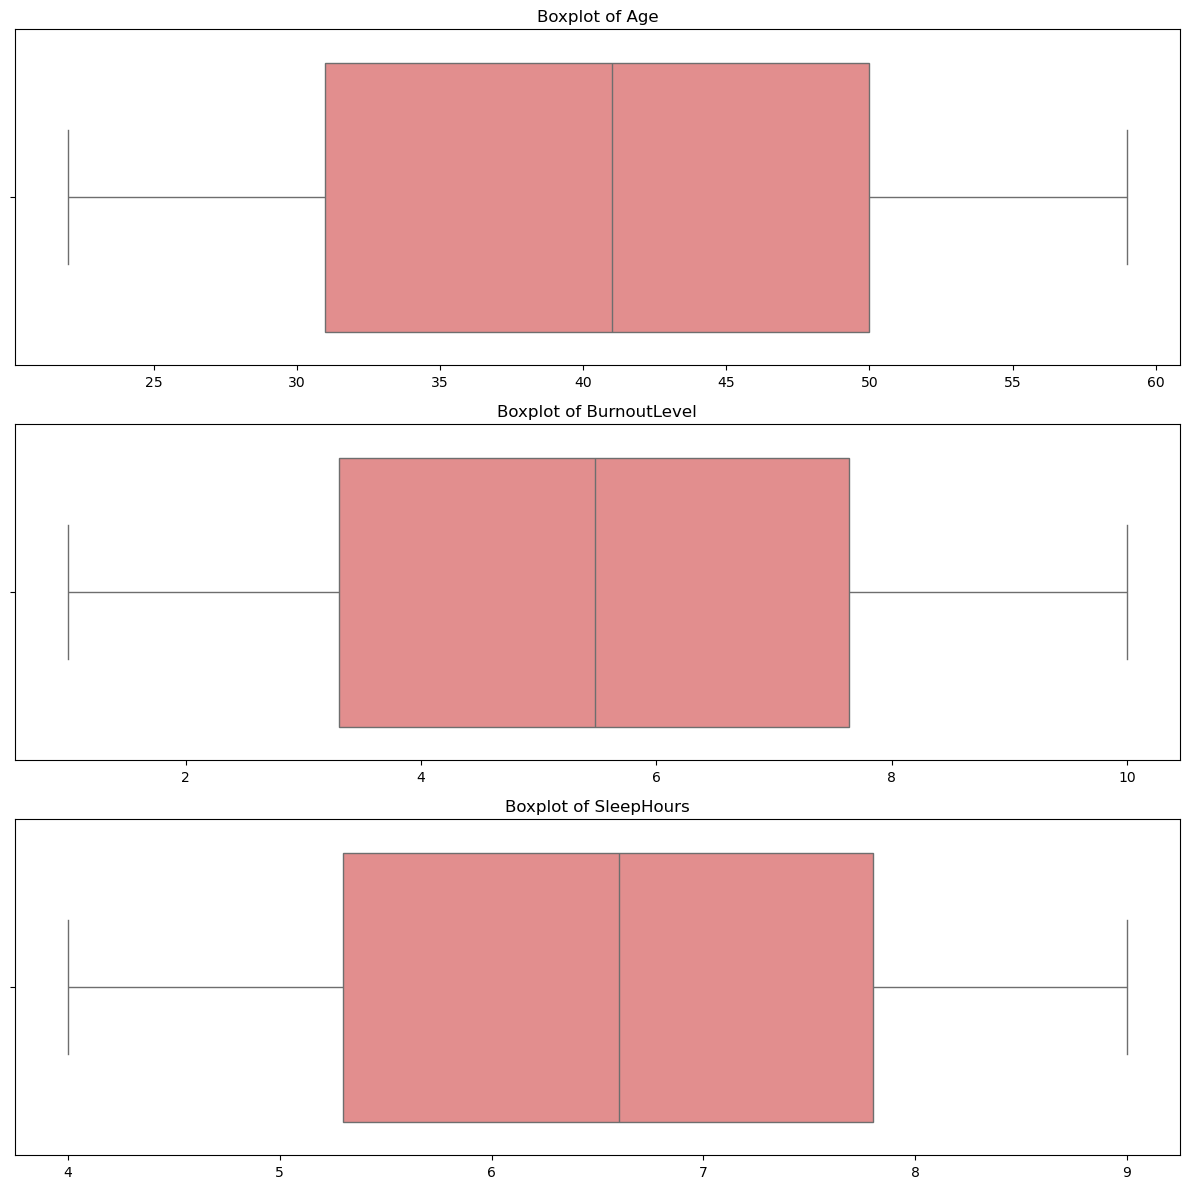

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_cols = ['Age', 'BurnoutLevel', 'SleepHours']

# Plotting
plt.figure(figsize=(12, 12))

for i, col in enumerate(selected_cols, 1):
    plt.subplot(len(selected_cols), 1, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.tight_layout()

plt.show()



In [39]:
selected_cols = ['Age', 'BurnoutLevel', 'SleepHours']
for col in selected_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"\nColumn: {col}")
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"IQR (Q3 - Q1): {IQR}")



Column: Age
Q1 (25th percentile): 31.0
Q3 (75th percentile): 50.0
IQR (Q3 - Q1): 19.0

Column: BurnoutLevel
Q1 (25th percentile): 3.3
Q3 (75th percentile): 7.64
IQR (Q3 - Q1): 4.34

Column: SleepHours
Q1 (25th percentile): 5.3
Q3 (75th percentile): 7.8
IQR (Q3 - Q1): 2.5


In [40]:
selected_cols = ['Age', 'BurnoutLevel', 'SleepHours']

for col in selected_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"\nColumn: {col}")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")



Column: Age
Q1: 31.0
Q3: 50.0
IQR: 19.0
Lower Bound: 2.5
Upper Bound: 78.5

Column: BurnoutLevel
Q1: 3.3
Q3: 7.64
IQR: 4.34
Lower Bound: -3.21
Upper Bound: 14.149999999999999

Column: SleepHours
Q1: 5.3
Q3: 7.8
IQR: 2.5
Lower Bound: 1.5499999999999998
Upper Bound: 11.55


In [33]:
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]


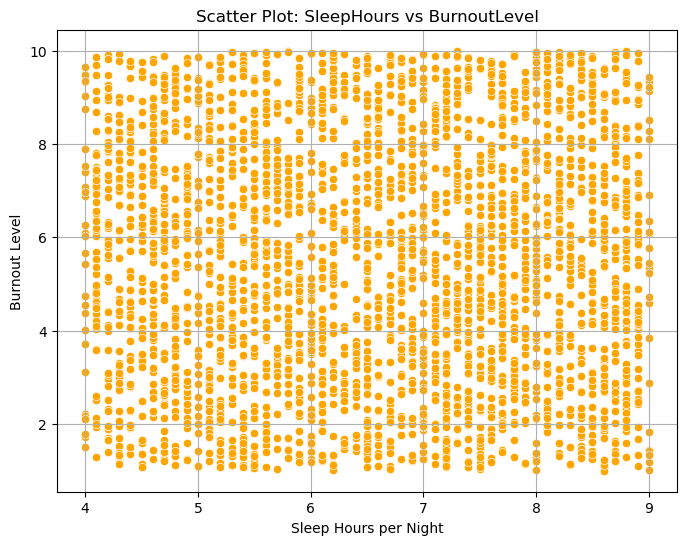

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SleepHours', y='BurnoutLevel', color='orange')

# Plot settings
plt.title('Scatter Plot: SleepHours vs BurnoutLevel')
plt.xlabel('Sleep Hours per Night')
plt.ylabel('Burnout Level')
plt.grid(True)
plt.show()



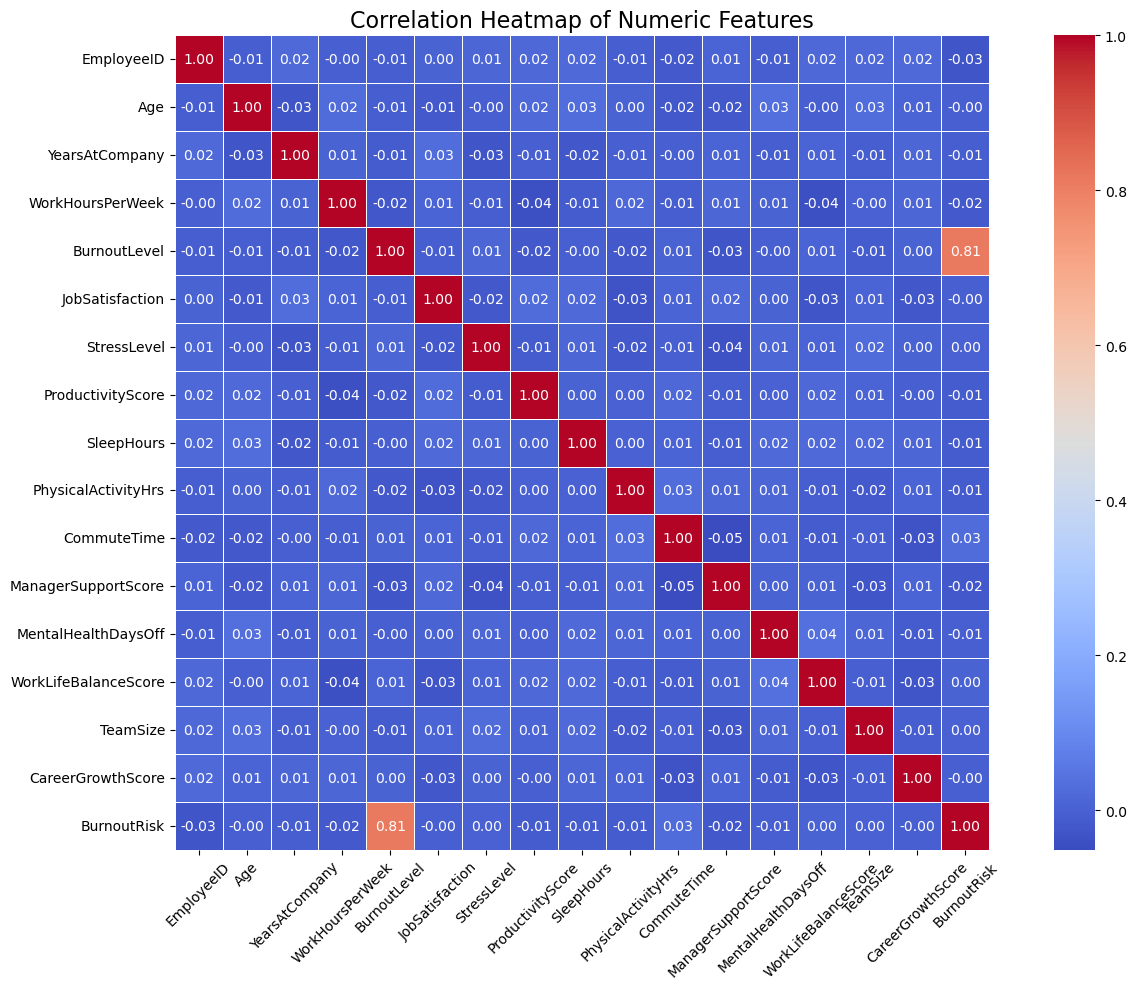

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
